In [89]:
import os
from langgraph.graph import StateGraph,START,END
import random
from typing import TypedDict,List,Optional
from IPython.display import Image,display

In [90]:
class AgentState(TypedDict):
    name:str
    number:Optional[List[int]]
    counter:int

In [91]:
def greeting_node(state:AgentState) -> AgentState:
    """ Greeting Node Say Hi to a person"""
    state['name'] = f"Hi, {state['name']}"
    state['counter'] = 0
    return state

In [92]:
def random_node(state:AgentState) -> AgentState:
    """ Generate random number from 0 to 5 """
    state['number'].append(random.randint(0,5))
    state['counter'] += 1
    return state


In [93]:
def should_continue(state:AgentState) -> AgentState:
    """ Decide continue the loop"""
    if state['counter'] < 5:
        print(f"inside loop :: {state['counter']}")
        return "loop"
    else:
        print("exit")
        return "exit"

In [94]:
builder = StateGraph(state_schema=AgentState)

In [95]:
builder.add_node("greeter",greeting_node)
builder.add_node("random",random_node)
builder.add_edge("greeter","random")
#builder.set_finish_point("randomer")
builder.add_conditional_edges("random", #source node
                              should_continue, # Action Node
                              {
                                  "loop":"random",
                                  "exit": END
                              }
                              )


builder.set_entry_point("greeter")

In [96]:
graph = builder.compile()

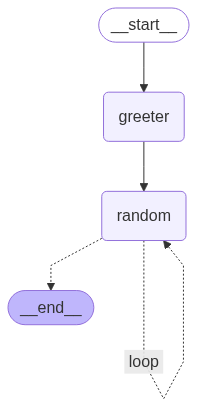

In [87]:
Image(graph.get_graph().draw_mermaid_png())

In [97]:
graph.invoke({"name":"Vaibhav", "number":[], "counter":-100})

inside loop :: 1
inside loop :: 2
inside loop :: 3
inside loop :: 4
exit


{'name': 'Hi, Vaibhav', 'number': [3, 4, 4, 5, 4], 'counter': 5}